## Importing Packages

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import gdown as gd
from sklearn.model_selection import train_test_split

# For purely aesthetic reasons
from matplotlib import cm

# 1) Training an Artificial Neural Network

## Dataset Preparation

First, using `pandas` and `Gdown`, we load the given dataset data_Q1.csv into `data_Q1_df`.

In [57]:
data_Q1_df = pd.read_csv(gd.download(f"https://drive.google.com/uc?id=106QVlX_0sycr-sIURNCXUy-2kE35WyjG", "data_Q1.csv", quiet=False))

Downloading...
From: https://drive.google.com/uc?id=106QVlX_0sycr-sIURNCXUy-2kE35WyjG
To: /content/data_Q1.csv
100%|██████████| 8.47k/8.47k [00:00<00:00, 16.9MB/s]


Then, using the `.to_numpy()` method, we convert each column of the dataframe into a NumPy array, and store them in arrays named `training_x1`, `training_x2`, and `training_y` respectively. Let $N$ denote the length of each array.

In [58]:
training_x1 = data_Q1_df.iloc[:, 0].to_numpy()  # First column
training_x2 = data_Q1_df.iloc[:, 1].to_numpy()  # Second column
training_y = data_Q1_df.iloc[:, 2].to_numpy()  # Third column
training_y = training_y.reshape(-1, 1)  # Reshape to a column vector
N = len(training_x1)

print(N)

200


We create a new NumPy array by pairing up `training_x1` and `training_x2`.

In [59]:
training_x = np.array([[x1,x2,1] for x1,x2 in zip(training_x1,training_x2)])

## Preliminaries

This neural network consists of one _input_ layer with 2 nodes, one _hidden_ layer with 3 nodes, and an _output_ layer. Below is the model for this neural network:
$$X\overset{W^{(1)}}{\longrightarrow}H\overset{\sigma}{\longrightarrow}Z\overset{W^{(2)}}{\longrightarrow}O\overset{\sigma}{\longrightarrow}\hat{y}.$$

Here:
- $X$ is the input data.
- $W^{(1)}=\left\{W^{(1)}_{k,l}:k,l\in\{1,2,3\}\right\}$ is a weight matrix connecting the input layer to the hidden layer.
- $W^{(2)}=\left\{W^{(2)}_{k,l}:k,l\in\{1,2,3\}\right\}$ is a weight matrix connecting the hidden layer to the output layer.
- $\sigma$ represents the `sigmoid` function, defined in the next section.
- $H = X \times W^{(1)}$ is an $N\times3$ matrix obtained at the hidden layer, before the activation function is applied.
- $Z$ is an $N\times4$ matrix obtained in the _hidden_ layer by applying the activation function on $H$, followed by appending a _bias_ column to the end.
- $O=X\times W^{(2)}$ is an $N\times1$ matrix obtained at the output layer, which on applying the activation function to, becomes $\hat{y}$, an $N\times1$ matrix, containing the predicted values.

To measure the performance of our neural network, we use _mean-squared error-loss_, defined as $$\mathcal{L}(Y,\hat{y}):=\frac{1}{2N}\sum^N_{i=1}(Y_i-\hat{y_i})^2,$$ where $N$ is the number of datapoints, $Y_i$ represents the true value, and $\hat{y_i}$ represents the predicted value for the $i^{th}$ datapoint.

## Definitions and Initializations

Define `sigmoid`, which takes one single input $x$ and returns $\frac{1}{1-e^{-x}}$, and `grad_sigmoid`, which takes a simgle input $s$ and returns the derivative of $\sigma(x)$.

In [60]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

Initialize weight matrices $W_1$ and $W_2$.

In [61]:
np.random.seed(123)
weights1 = np.random.uniform(-1, 1, (3, 3))
weights2 = np.random.uniform(-1, 1, (4, 1))

# The following lines have been used purely for debugging/verification
print(weights1)
print(weights2)

[[ 0.39293837 -0.42772133 -0.54629709]
 [ 0.10262954  0.43893794 -0.15378708]
 [ 0.9615284   0.36965948 -0.0381362 ]]
[[-0.21576496]
 [-0.31364397]
 [ 0.45809941]
 [-0.12285551]]


Initialize the learning rate, $\gamma$, to 0.05, ant the number of passes, `max_epochs`, to 100.

In [62]:
gamma = 0.05
max_epochs = 100

Create an empty array to store the training errors after each epoch. Name the array `training_error`.

In [63]:
training_error=[]

## Training the Neural Network

We first implement the forward pass, and loss calculation, before storing the loss in `training_error`. Then,

In [64]:
for epoch in range(max_epochs):

    #---------- Forward Pass ----------

    # Initialize X to training_x
    X = training_x

    # Hidden Layer pre-activation
    H = X @ weights1

    # Hidden Layer activation
    Z = sigmoid(H)

    # Append Bias Column
    Z = np.hstack((Z, np.ones((Z.shape[0], 1))))

    # Output Layer pre-activation
    O = Z @ weights2

    # Output Layer activation
    y_cap = sigmoid(O)

    # Compute Loss, and append to training_error
    loss = (1 / (2 * len(training_y))) * np.sum((training_y - y_cap) ** 2)
    training_error.append(loss)

    #---------- Backpropagation ----------

    # Compute gradient for weights2
    temp2 = -(training_y - y_cap) * grad_sigmoid(O)
    gradient2 = Z.T @ temp2
    gradient2 /= len(training_y)

    # Compute gradient for weights1
    temp = -(training_y - y_cap) * grad_sigmoid(O) * grad_sigmoid(H)
    temp = temp @ np.diag(weights2[:-1].reshape(-1))
    gradient1 = training_x.T @ temp
    gradient1 /= len(training_y)

    # Update weights using gradient descent
    weights2 -= gamma * gradient2
    weights1 -= gamma * gradient1

    # The following lines have been used purely for debugging/verification
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.6f}")

Epoch 0: Loss = 0.123883
Epoch 10: Loss = 0.123856
Epoch 20: Loss = 0.123832
Epoch 30: Loss = 0.123811
Epoch 40: Loss = 0.123792
Epoch 50: Loss = 0.123776
Epoch 60: Loss = 0.123761
Epoch 70: Loss = 0.123748
Epoch 80: Loss = 0.123736
Epoch 90: Loss = 0.123726


## Plotting the Training Loss

We use `matplotlib.pyplot` to plot the training loss, with the training loss on the $y$-axis, and the epochs on the $x$-axis.

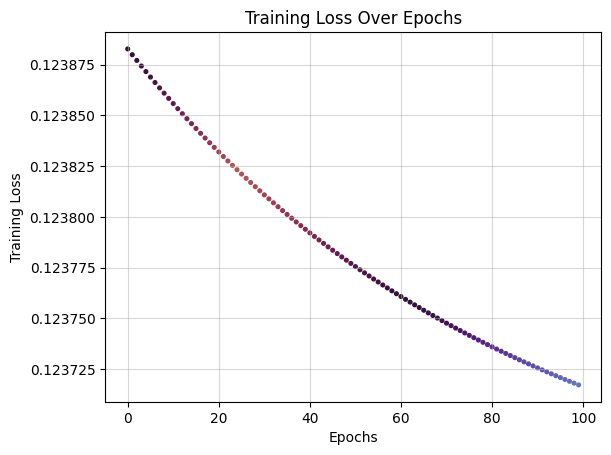

In [287]:
# Custom-made part for aesthetics, does not affect the actual data
n = len(training_error)
partway = n // 4
colors_first_half = cm.twilight(np.linspace(0.5, 0.75, partway))
colors_second_half = cm.twilight(np.linspace(0.75, 0.25, n- partway))
colors = np.concatenate([colors_first_half, colors_second_half])
# Custom-made part ends

plt.scatter(range(max_epochs), training_error, color=colors, s=7)

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True, alpha = 0.5)
plt.show()

# Classification using the $k$-Nearest Neighbours Technique

## Data Pre-Processing and Cleaning

We create an array named `column_names`, containing the names of the columns of the dataset, since they were not a part of the original .csv file. Using this array and the url, we import the dataset into a dataframe named `abalone_df`.

In [66]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

# Create the column_names array
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight','ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

# Read the dataset
abalone_df = pd.read_csv(url, header=None, names=column_names)

# The following line has been used purely for debugging/verification
abalone_df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Since the sex of the abalone does not directly influence its age, we remove this column from the DataFrame.

In [67]:
abalone_df = abalone_df.drop(columns=["Sex"])

# The following line has been used purely for debugging/verification
abalone_df.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Training and Test Data

In [68]:
# Separate features (X) and target (y)
X = abalone_df.drop(columns=["Rings"]).values  # Remove column names by using .values
y = abalone_df["Rings"].values                 # Extract target values

Split the dataset into training (70%) and testing (30%) sets.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [70]:
# The following lines have been used purely for debugging/verification

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2923, 7)
(1254, 7)
(2923,)
(1254,)


## Implementing the $k$-Nearest Neighbours Algorithm

Create a new abalone data point, named `new_abalone`.

In [71]:
new_abalone = np.array([0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208])

Using `np.linalg.norm()`, we compute the Euclidean distance between each row of `X_train` and the new data point, and store them in a variable named `distances`.

In [72]:
distances = np.linalg.norm(X_train - new_abalone, axis=1)

We now sort the values in `distances`, befure using `np.argsort` to get the sorted indices of the elements in `distances`, of which we select the first three, which represent the _"three closest neighbours"_.

In [73]:
k = 3
nearest_neighbours = np.argsort(distances)[:k]

We use `nearest_neighbours` to find the respective `nearest_ages`. From these, we select the most-recurring age (i.e. the _"mode"_).

In [136]:
nearest_ages = y_train[nearest_neighbours]

# Compute the mode (most frequent age)
predicted_age = st.mode(nearest_ages, keepdims=False).mode

# The following line has been added purely for debugging/verification
print(nearest_ages)
print(predicted_age)

[10 11 11]
11


Here, we face a problem: In the event all three ages are different, `st.mode()` automatically picks the smallest value. We require one of the values to be chosen randomly, which we can do by adding the following snippet of code:

In [143]:
if len(set(nearest_ages)) == len(nearest_ages):  # set(nearest_ages) eliminates repeated elements
    predicted_age = np.random.choice(nearest_ages)

# The following line has been added purely for debugging/verification
print(predicted_age)

8


Treating each row in `X_test` as a new abalone dataset, we now repeat the above steps, and store the predicted ages in `predicted_ages_test`.

In [145]:
predicted_ages_test = []

for i in range(len(X_test)):
    distances = np.linalg.norm(X_train - X_test[i], axis=1)
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_ages = y_train[nearest_neighbors]
    predicted_age = st.mode(nearest_ages, keepdims=False).mode

    if len(set(nearest_ages)) == len(nearest_ages):  # set(nearest_ages) eliminates repeated elements
        predicted_age = np.random.choice(nearest_ages)

    predicted_ages_test.append(predicted_age)

# The following line has been added purely for debugging/verification.
print(predicted_ages_test[:5])

[8, 7, 10, 8, 7]


We now compute the _mean square error_, or _MSE_, of these predictions, using the formula $$\mathtt{MSE}=\frac{1}{M}\sum_{j=0}^{M-1}\left(\mathtt{predicted\_ages\_test}[j]-\mathtt{y\_test}[j]\right)^2,$$ where $M$ is the length of $\mathtt{y\_test}$ column.

In [146]:
MSE = np.mean((predicted_ages_test - y_test) ** 2)

print(MSE)

8.10207336523126


## Tuning $k$ to Achieve Optimal Performance

We are to vary $k$ from $1$ to $50$, and compute the $\mathtt{MSE}$ value for each $k$. We then are required to store these values in an array named `mse_values`. We first initialize the required array, and then create `k_values`, ranging from $1$ to $50$.

To get a better estimate of the _"perfect"_ $k$, we can increase the range of `k_values`.

In [189]:
mse_values = []

# Create k_values, from 1 to 50
k_values = range(1, 51) # 51 is excluded

Now, we iterate $k$ over `k_values`, compute the $\mathtt{MSE}$ for each $k$, and append these values to the previously-defined `mse_values`.

In [190]:
for k in k_values:
    predicted_ages_test = []

    for i in range(len(X_test)):
        distances = np.linalg.norm(X_train - X_test[i], axis=1)
        nearest_neighbors = np.argsort(distances)[:k]
        nearest_ages = y_train[nearest_neighbors]
        predicted_age = st.mode(nearest_ages, keepdims=False).mode

        if len(set(nearest_ages)) == len(nearest_ages):  # set(nearest_ages) eliminates repeated elements
            predicted_age = np.random.choice(nearest_ages)

        predicted_ages_test.append(predicted_age)

    predicted_ages_test = np.array(predicted_ages_test)

    # Compute MSE for this iteration i.e. for this k
    MSE = np.mean((predicted_ages_test - y_test) ** 2)
    mse_values.append(MSE)

We then plot `mse_values` against values of $k$.

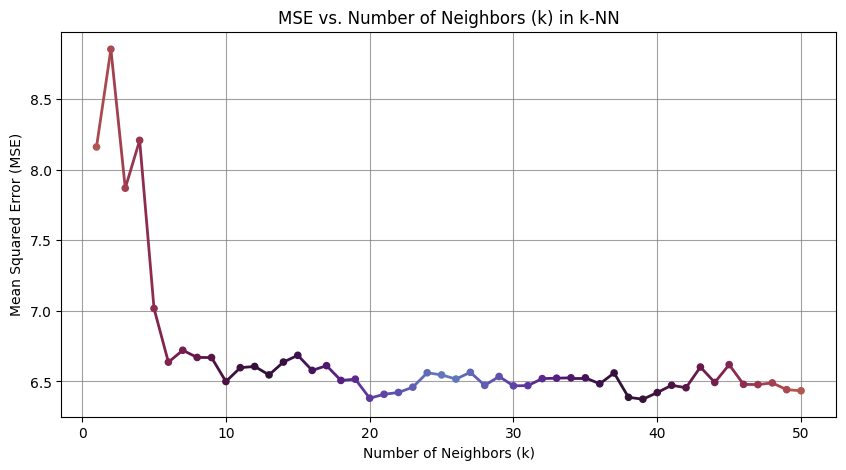

In [288]:
plt.figure(figsize=(10, 5))

# Custom-made part for aesthetics, does not affect the actual data
n = len(k_values)
halfway = n // 2
colors_first_half = cm.twilight(np.linspace(0.75,0.25, halfway))
colors_second_half = cm.twilight(np.linspace(0.25,0.75, halfway))
colors = np.concatenate([colors_first_half, colors_second_half])
for i in range(1, len(k_values)):
    plt.plot(k_values[i-1:i+1], mse_values[i-1:i+1], color=colors[i], linewidth=2)
# Custom-made part ends

plt.scatter(k_values, mse_values, color = colors, s=20, zorder=7)

# plt.plot(k_values, mse_values, marker='o', linestyle='solid', color = 'darkgreen', markersize=4.5,markerfacecolor='black', markeredgecolor='darkslategrey', lw=1.5)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Number of Neighbors (k) in k-NN")
plt.grid(True, color = 'grey', linestyle = '-', alpha = 0.75)
plt.show()

Now, we find the optimal value of $k$, which is the value of $k$ with the lowest corresponding $\mathtt{MSE}$ value.

In [289]:
optimal_k = k_values[np.argmin(mse_values)]  # Find k with lowest MSE
optimal_mse = min(mse_values)  # Minimum MSE value

print(f"Optimal k: {optimal_k}")
print(f"Minimum MSE: {optimal_mse}")

Optimal k: 39
Minimum MSE: 6.3740031897926634
